In [338]:
# Loading all packages + ignoring warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn import linear_model, tree
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import requests
from datetime import datetime
import json
import matplotlib
import statsmodels.api as sm
from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

In [339]:
# Request urls for data for different keyword searches
url_job = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4fe6-2dsET3xP7h1Y3OweS11kacFLhU&tz=-120'
url_dagpenge = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22dagpenge%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffDqYGsvDiXLzsbRtwEuGUVj_gICFU&tz=-120'
url_kontanthjælp = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22kontanthj%C3%A6lp%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffJ7sJM8lV9LeHcUdNOKX43WYeIRWn&tz=-120'
url_akasse = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22a-kasse%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffTdu5RMRJshD0S9n7rP1AvC-sah16&tz=-120'
url_jobnet = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22jobnet%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffsYDR_Of8TjMQhVk5wt0TMZzRgKuT&tz=-120'

# Blacklist
#url_arbejdsløs = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22arbejdsl%C3%B8s%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4aT9nXvFVzgx4l6U0RtVOEl_spRZ3J_&tz=-120'
#url_jobindex = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22jobindex%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4at229ZiMy59btGP0Mmnbl8mLSJz85a&tz=-120'

url_list = [url_job,
            url_dagpenge,
            url_kontanthjælp,
            url_akasse,
            url_jobnet
           ]

combined_list = []

for j in url_list:
    response = requests.get(j)
    print(response.ok)
    print('-----')
    dict_ = json.loads(response.text.split(")]}\',\n")[1])

    # saving length of the timelineData dict
    dict_length = len(dict_['default']['timelineData'])

    timelinedata_list = [] 

    for i in range(0,dict_length):
        # Extracting value (keyword: 'time')
        time = dict_['default']['timelineData'][i]['time']
    
        year = datetime.utcfromtimestamp(int(time)).strftime('%Y')
        month = datetime.utcfromtimestamp(int(time)).strftime('%m')
        # Extracting value (keyword: 'value'). Pulling out first element, since list with one element.
        value = dict_['default']['timelineData'][i]['value'][0]
    
    
        help_list =[]
        if j == url_list[0]:
            help_list.append(year)
            help_list.append(month)
        help_list.append(value)
        timelinedata_list.append(help_list)
    
    if j == url_list[0]:
        for l in range(0, len(timelinedata_list)):
            
            combined_list.append(timelinedata_list[l])
    else:
        for k in range(0,len(timelinedata_list)):
            combined_list[k].append(timelinedata_list[k][0])

df = pd.DataFrame(combined_list)
df.columns = ['Year', 'Month',
              'Average_GI_job',
              'Average_GI_dagpenge',
              'Average_GI_kontanthjælp', 
              'Average_GI_akasse',
              'Average_GI_jobnet'
             ]

df2 = df.groupby(['Year', 'Month'], as_index=False).mean()
df2.plot(figsize=(15,8))

#df2.to_csv("googledata29082018.csv", index=False)
df2 = pd.read_csv("googledata29082018.csv")
print(df2.head())

False
-----


IndexError: list index out of range

139.0


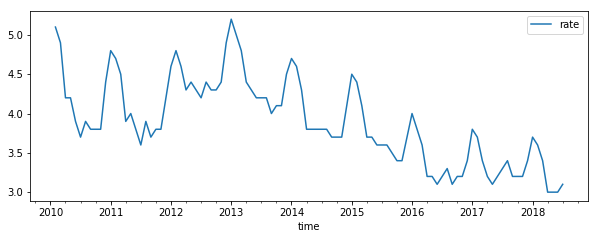

In [399]:
###-------------User input start----------------###
# Number of lags for explanatory variables
n_lags = 1
# Should be set to 1 for seasonally adjusted unemployment data and 0 otherwise
season_adjustment = 0
# Specify type of unemployment - 'ILO-unemp', 'Net unemp' or 'Gross unemp'
unemp_type = 'Net unemp'
# Number of months from 2007-01 to cut
cut_n_months = 36
###--------------User input end-----------------###

# Importing unemployment data from statbank.dk
AKUurl = 'https://api.statbank.dk/v1/data/AKU125/CSV?lang=en&valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&allowVariablesInHead=true&S%C3%86SON=11&S%C3%86SON=10&BESKSTATUS=LPCT&TID=*'
AKUcsv = pd.read_csv(AKUurl, sep = ";")
unemp_url = 'https://api.statbank.dk/v1/data/AUS07/CSV?lang=en&valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&allowVariablesInHead=true&YD=TOT&YD=NET&TID=*&SAESONFAK=9&SAESONFAK=22'
raw_unemp = pd.read_csv(unemp_url, sep = ";")

# Reshaping and constructing dummies for filtering
AKUcsv['season_adj'] = np.where(AKUcsv['SÆSON'] == 'Non-seasonally adjusted', 0, 1)
AKUcsv.columns = ['todrop', 'type', 'time', 'rate', 'season_adj']
AKUcsv['type'] = AKUcsv['type'].str.replace(r'rate', r'')
AKU = AKUcsv.drop('todrop', axis=1)
raw_unemp['season_adj'] = np.where(raw_unemp['SAESONFAK'] == 'Seasonally adjusted figures in percent of the labour force', 1, 0)
raw_unemp.columns = ['type', 'time', 'SAESONFAK', 'rate', 'season_adj']
unemp = raw_unemp.drop('SAESONFAK', axis=1)

# Merge data 
df_all = pd.concat([AKU, unemp], ignore_index=True)

# Convert variable time to date format and sort by date
df_all['time'] = df_all['time'].str.replace(r'\D', r' ')
df_all['time'] = pd.to_datetime(df_all['time'], format = "%Y %m" )
df_all = df_all.sort_values('time')

# Shortening of type names
df_all['type'] = df_all['type'].str.replace(r'unemployment', r'unemp')
df_all['type'] = df_all['type'].str.strip()
#print(df_all)

# Creating df that contains data for relevant type of unemployment.
unemp_rates = df_all[(df_all['season_adj']==season_adjustment) & (df_all['type']==unemp_type)].drop(columns='season_adj')
unemp_rates = unemp_rates.reset_index(drop=True)

# Copying unemployment rates for creating first difference variable later
unemp_rates_first_diff = unemp_rates.copy()

# Create varaible lagged unemplyment rate
df2['unemp_lag1'] = unemp_rates['rate'].shift(n_lags)

# Create variables for lagged average GIs
df3 = df2.copy()
df3['Average_GI_job_lag1'] = df3['Average_GI_job'].shift(n_lags)
df3['Average_GI_dagpenge_lag1'] = df3['Average_GI_dagpenge'].shift(n_lags)
df3['Average_GI_kontanthjælp_lag1'] = df3['Average_GI_kontanthjælp'].shift(n_lags)
df3['Average_GI_akasse_lag1'] = df3['Average_GI_akasse'].shift(n_lags)
df3['Average_GI_jobnet_lag1'] = df3['Average_GI_jobnet'].shift(n_lags)

# Removing first observation in both dataframes, sinces df3 now contains NA i first row
# Additionally ensuring that d4 and unemp_rates have the same number of columns
df4 = df3[(n_lags+cut_n_months):len(unemp_rates)]
unemp_rates = unemp_rates[(n_lags+cut_n_months):]


# Construction X and y
X = np.array(df4[['Average_GI_job_lag1',
                  'Average_GI_dagpenge_lag1',
                  'Average_GI_kontanthjælp_lag1', 
                  'Average_GI_akasse',
                  'Average_GI_jobnet'#,
                  #'unemp_lag1'
                 ]]) # creating ndarray of X values (2 variables)
X_ar = np.array(df4[['unemp_lag1']]) # creating ndarray of X values (2 variables)
y = np.array(unemp_rates[['rate']])


# Security check to ensure that length of variable lists match.
if (len(X)-len(y)!=0):
    print('-------------------------------------------------------------------')
    print('----WARNING: Number of observations in X and y does not match!!----')
    print('---------------Length of y: ' + str(len(y)) + '. Length of X: ' + str(len(X)) + '------------------')
    print('-------------------------------------------------------------------')
unemp_rates.plot(x='time', y='rate', figsize=(10,3.5))

# Constructing first diff y
unemp_rates_first_diff['unemp_rate_fd'] = unemp_rates_first_diff['rate']-unemp_rates_first_diff['rate'].shift(1)
unemp_rates_first_diff = unemp_rates_first_diff[1+cut_n_months:]
y_fd = np.array(unemp_rates_first_diff[['unemp_rate_fd']])


In [358]:
# Split into continous time series
###----------------User input start------------------###
train_share = 0.5
validation_share = 0.3
test_share = 0.2
# Specify X - should be either 'X' og 'X_ar' (autoregressive).
X_type = X
# Specify y - should be either y or y_fd (first diff)
y = y_fd
###-----------------User input end-------------------###

dev_share = train_share + validation_share

# Constructing samples split
X_dev_ts = X_type[:int(len(X_type)*dev_share)]
X_train_ts = X_type[:int(len(X_type)*train_share)]
X_val_ts = X_type[int(len(X_type)*train_share):int(len(X_type)*dev_share)]
X_test_ts = X_type[int(len(X_type)*dev_share):] 

if (len(X_train_ts)+len(X_val_ts)+len(X_test_ts))!= len(X_type):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(X_dev_ts): ' + str(len(X_dev_ts)))
    print('len(X_train_ts): ' + str(len(X_train_ts)))
    print('len(X_val_ts): ' + str(len(X_val_ts)))
    print('len(X_test_ts): ' + str(len(X_test_ts)))

y_dev_ts = y[:int(len(y)*dev_share)]    
y_train_ts = y[:int(len(y)*train_share)]
y_val_ts = y[int(len(y)*train_share):int(len(y)*(dev_share))]
y_test_ts = y[int(len(y)*dev_share):] 

if (len(y_train_ts)+len(y_val_ts)+len(y_test_ts))!= len(y):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(y_dev_ts): ' + str(len(y_dev_ts)))
    print('len(y_train_ts): ' + str(len(y_train_ts)))
    print('len(y_val_ts): ' + str(len(y_val_ts)))
    print('len(y_test_ts): ' + str(len(y_test_ts)))

len(X_dev_ts): 81
len(X_train_ts): 51
len(X_val_ts): 30
len(X_test_ts): 21
len(y_dev_ts): 81
len(y_train_ts): 51
len(y_val_ts): 30
len(y_test_ts): 21


n_degree:1
Test mse: 0.021809


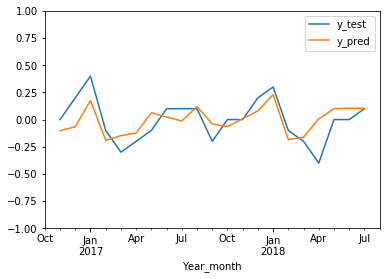

In [385]:
# ------Lasso/Ridge------- #
###---------------User input start-----------------###
# Specify which model to use - either 'Lasso' or linear_model.Ridge
use_model = Lasso
# Specify polynomial degree to allow
n_degree = 1
###----------------User input end------------------###
#test_mse_list = [] 
#for n_degree in range(1,11):
perform = []
lambdas = np.logspace(-4, 4, 33)
#print(lambdas)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), 
                               StandardScaler(),
                               use_model(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train_ts, y_train_ts)
    y_pred_ts_lasso = pipe_lasso.predict(X_val_ts) # Transformation?
    perform.append(mse(y_pred_ts_lasso, y_val_ts))

hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)
#print('Optimal lambda' + str(optimal))

# using optimal lambda in new pipe
pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), # dont use poly features for OLS
                           StandardScaler(),
                           use_model(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev_ts,y_dev_ts) # Fitting model to development data set using new pipe
print('n_degree:' + str(n_degree))
print('Test mse:', round(mse(pipe_lasso.predict(X_test_ts),y_test_ts), 6))


#print('Train mse:', round(mse(pipe_lasso.predict(X_train_ts),y_train_ts), 4))
test_mse_list.append(mse(pipe_lasso.predict(X_test_ts),y_test_ts))
test_mse_df = pd.DataFrame(test_mse_list)

y_pred_ts_lasso = pipe_lasso.predict(X_test_ts)
df_y_test_ts = pd.DataFrame(y_test_ts)
df_y_pred_ts_lasso = pd.DataFrame(y_pred_ts_lasso)

df_ts = pd.DataFrame()
df_ts['y_test'] = df_y_test_ts[0]
df_ts['y_pred'] = df_y_pred_ts_lasso[0]
df_ts['Year_month'] = np.array(unemp_rates['time'][int(len(y)*dev_share):])
df_ts.set_index('Year_month', inplace=True)
df_ts.plot(ylim = [-1,1])
#test_mse_df.plot()


In [360]:
# ------Ridge------- #
###---------------User input start-----------------###
# Specify which model to use - either 'Lasso' or linear_model.Ridge
use_model = linear_model.Ridge
# Specify polynomial degree to allow
n_degree = 2
###----------------User input end------------------###
#test_mse_list = [] 
#for n_degree in range(1,11):
perform = []
lambdas = np.logspace(-4, 4, 33)
#print(lambdas)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), 
                               StandardScaler(),
                               use_model(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train_ts, y_train_ts)
    y_pred_ts = pipe_lasso.predict(X_val_ts) # Transformation?
    perform.append(mse(y_pred_ts, y_val_ts))

hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)
#print('Optimal lambda' + str(optimal))

# using optimal lambda in new pipe
pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), # dont use poly features for OLS
                           StandardScaler(),
                           use_model(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev_ts,y_dev_ts) # Fitting model to development data set using new pipe
print('n_degree:' + str(n_degree))
print('Test mse:', round(mse(pipe_lasso.predict(X_test_ts),y_test_ts), 6))


#print('Train mse:', round(mse(pipe_lasso.predict(X_train_ts),y_train_ts), 4))
test_mse_list.append(mse(pipe_lasso.predict(X_test_ts),y_test_ts))
test_mse_df = pd.DataFrame(test_mse_list)

y_pred_ts_ridge = pipe_lasso.predict(X_test_ts)
#df_y_test_ts = pd.DataFrame(y_test_ts)
#df_y_pred_ts = pd.DataFrame(y_pred_ts)


n_degree:2
Test mse: 0.024828


OLS 0.0338
102
80
20


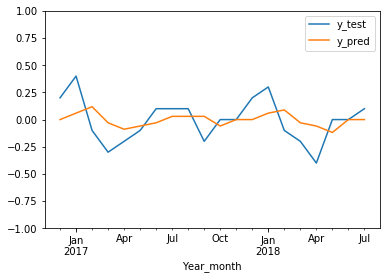

In [382]:
#--------AR(1) - OLS----------#

X_dev_ar = y_dev_ts.copy()[:-1]
X_test_ar = y_test_ts.copy()[:-1]
#print(X_dev_ar[0:5])
#print(X_test_ar[0:5])

y_dev_ar = y_dev_ts[1:]
y_test_ar = y_test_ts[1:]
#print(y_dev_ar[0:5])
#print(y_test_ar[0:5])

model = sm.OLS(y_dev_ar, X_dev_ar).fit()
predictions = model.predict(X_test_ar)
model.summary()
print('OLS', round(mse(predictions,y_test_ar), 4))

#X_dev_ts_p = PolynomialFeatures(degree=1).fit_transform(X_dev_ts)
#X_test_ts_p = PolynomialFeatures(degree=1).fit_transform(X_test_ts)

#reg = LinearRegression().fit(X_dev_ts_p, y_dev_ts)
#mse(reg.predict(X_test_ts_p),y_test_ts)
#pred2 = reg.predict(X_test_ts_p)

print(len(unemp_rates))
print(len(y_dev_ar))
print(len(y_test_ar))

df_y_test_OLS = pd.DataFrame(y_test_ar)
df_y_pred_OLS = pd.DataFrame(predictions)
df_OLS = pd.DataFrame()
df_OLS['y_test'] = df_y_test_OLS[0]
df_OLS['y_pred'] = df_y_pred_OLS[0]
df_OLS['Year_month'] = np.array(unemp_rates['time'][int(len(y_dev_ar)+2):])
df_OLS.set_index('Year_month', inplace=True)

df_OLS.plot(ylim = [-1,1])

# Decision Tree
1. Tuning of hyperparameters
2. Fit to train-data + MSE score

In [309]:
# Optimization of hyperparameters
# build a classifier
clf = DecisionTreeRegressor(random_state=1)#n_jobs=4, oob_score = False)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(3, 12),
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 6)#,
              #"bootstrap": [True, False],
              #"n_estimators": sp_randint(25,501)
             }

# run randomized search
n_iter_search = 1000
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_dev_ts, y_dev_ts.ravel())
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 4.88 seconds for 1000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.074 (std: 0.120)
Parameters: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.057 (std: 0.164)
Parameters: {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.057 (std: 0.164)
Parameters: {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}

Model with rank: 2
Mean validation score: 0.057 (std: 0.164)
Parameters: {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 8}



In [397]:
# Decision Tree with optimized hyperparameters
random_forest_mse_list = []

# bootstrap': False, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 301}
# bootstrap': False, 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 101}
#'bootstrap': False, 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 101}

tree = DecisionTreeRegressor(max_depth = 3, 
                             max_features= 1, 
                             min_samples_leaf = 1,
                             min_samples_split= 2,
                             random_state = 2
                            )
tree.fit(X_dev_ts, y_dev_ts.ravel())
tree_pred_dt = tree.predict(X_test_ts)
RF_mse= [mse(y_test_ts, tree_pred_dt)]
RF_mse
tree_pred_dt

array([-0.13157895, -0.13157895,  0.13913043, -0.13157895, -0.13157895,
       -0.13157895, -0.04444444, -0.13157895, -0.13157895,  0.13913043,
       -0.13157895,  0.13913043,  0.13913043, -0.13157895,  0.13913043,
       -0.13157895, -0.13157895, -0.13157895,  0.13913043, -0.04444444,
       -0.04444444])

# Random Forests
1. Tuning of hyperparameters
2. Fit to train-data + MSE score

In [265]:
# Optimization of hyperparameters
# build a classifier
clf = RandomForestRegressor(n_jobs=4, oob_score = False, random_state=1)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(3, 12),
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 6),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(25,501)}

# run randomized search
n_iter_search = 10000
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_dev_ts, y_dev_ts.ravel())
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 17960.20 seconds for 10000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.172 (std: 0.077)
Parameters: {'bootstrap': True, 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 26}

Model with rank: 2
Mean validation score: 0.170 (std: 0.062)
Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 35}

Model with rank: 3
Mean validation score: 0.161 (std: 0.062)
Parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 38}



In [346]:
# Random forest with optimized hyperparameters
random_forest_mse_list = []

# bootstrap': False, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 301}
# bootstrap': False, 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 101}
#'bootstrap': False, 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 101}

tree = RandomForestRegressor(bootstrap = True, 
                             max_depth = 6, 
                             max_features= 2, 
                             min_samples_leaf = 3,
                             min_samples_split= 3, 
                             n_estimators = 38,
                             random_state = 2)
tree.fit(X_dev_ts, y_dev_ts.ravel())
tree_pred_rf = tree.predict(X_test_ts)
RF_mse= [mse(y_test_ts, tree_pred_rf)]
RF_mse

[0.02289777835722196]

In [384]:
y_pred_ts_lasso = pd.DataFrame(y_pred_ts_lasso)
y_pred_ts_ridge = pd.DataFrame(y_pred_ts_ridge)
predictions = predictions + [float('nan')]
tree_pred_dt = pd.DataFrame(tree_pred_dt)
tree_pred_rf = pd.DataFrame(tree_pred_rf)

df_test = pd.DataFrame()
df_test['y_pred_ts_lasso'] = y_pred_ts_lasso[0]
df_test['y_pred_ts_ridge'] = y_pred_ts_ridge[0]
df_test['predictions'] = predictions[0]
df_test['tree_pred_dt'] = tree_pred_dt[0]
df_test['tree_pred_rf'] = tree_pred_rf[0]
df_test

,y_pred_ts_lasso,y_pred_ts_ridge,predictions,tree_pred_dt,tree_pred_rf
0,-0.102395,-0.045939,NaN,-0.250000,-0.106602
1,-0.065512,-0.029542,NaN,-0.040909,-0.057203
2,0.174846,0.090387,NaN,0.350000,0.185007
3,-0.190935,-0.123525,NaN,-0.040909,-0.054920
4,-0.147669,-0.078795,NaN,-0.040909,-0.083039
5,-0.123770,-0.071068,NaN,-0.040909,-0.087423
6,0.062368,0.026786,NaN,-0.040909,-0.002560
7,0.023103,0.009875,NaN,-0.040909,-0.025769
8,-0.013117,-0.024630,NaN,-0.040909,-0.002089
9,0.119797,0.057463,NaN,0.063636,0.158932
